In [1]:
import xarray as xr
import numpy as np

from matplotlib import pyplot as plt
import cartopy as cy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from geopy import distance
import math
import re

In [2]:
#ds =  xr.open_dataset('/home/anna/annaCode/forecast_notebooks/MyWaveWAM800/data/MyWave_wam800_c1SPC00.nc')
OPeNDAP_url = 'https://thredds.met.no/thredds/dodsC/ww3_4km_latest_files/ww3_C4_SPC_20241216T00Z.nc'
ds =  xr.open_dataset(OPeNDAP_url)
ds

<xarray.Dataset> Size: 430MB
Dimensions:                  (direction: 36, freq: 36, x: 566, y: 1, time: 73)
Coordinates:
  * direction                (direction) float32 144B 5.0 15.0 ... 345.0 355.0
  * freq                     (freq) float32 144B 0.03452 0.03798 ... 0.9702
  * x                        (x) int32 2kB 1 2 3 4 5 6 ... 562 563 564 565 566
  * y                        (y) int32 4B 1
  * time                     (time) datetime64[ns] 584B 2024-12-15T18:00:00 ....
    longitude                (y, x) float32 2kB ...
    latitude                 (y, x) float32 2kB ...
Data variables:
    forecast_reference_time  datetime64[ns] 8B ...
    SPEC                     (time, y, x, freq, direction) float64 428MB ...
    ff                       (time, y, x) float64 331kB ...
    dd                       (time, y, x) float64 331kB ...
    Pdir                     (time, y, x) float32 165kB ...
    hs                       (time, y, x) float32 165kB ...
    tp                       (time, y, x) float32 165kB ...
Attributes:
    title:                           2D wave spectra
    history:                         Mon Dec 16 03:28:14 2024: ncks -A -v hs,...
    history_of_appended_files:       Mon Dec 16 03:28:14 2024: Appended file ...
    NCO:                             netCDF Operators version 5.0.6 (Homepage...
    DODS_EXTRA.Unlimited_Dimension:  time

In [3]:
ds.latitude

<xarray.DataArray 'latitude' (y: 1, x: 566)> Size: 2kB
[566 values with dtype=float32]
Coordinates:
  * x          (x) int32 2kB 1 2 3 4 5 6 7 8 ... 559 560 561 562 563 564 565 566
  * y          (y) int32 4B 1
    longitude  (y, x) float32 2kB ...
    latitude   (y, x) float32 2kB ...
Attributes:
    standard_name:  latitude
    units:          degree_north
    long_name:      latitude

In [4]:
res = ds.longitude
res.values

array([[ 5.5487,  5.56  ,  5.5713,  5.5826,  5.5939,  5.6053,  5.6166,
         5.6279,  5.6392,  5.6505,  5.6618,  5.6731,  5.6844,  5.6957,
         5.707 ,  5.7183,  5.7296,  5.7409,  5.7522,  5.7634,  5.7747,
         5.7859,  5.7972,  5.8085,  5.8197,  5.831 ,  5.8422,  5.8535,
         5.8647,  5.876 ,  5.8872,  5.8984,  5.9097,  5.9209,  5.9321,
         5.9433,  5.9545,  5.9658,  5.977 ,  5.9882,  5.9994,  6.0106,
         6.0218,  6.033 ,  6.0442,  6.0554,  6.0665,  6.0777,  6.0889,
         6.1001,  6.1112,  6.1224,  6.1336,  6.1447,  6.1559,  6.167 ,
         6.1782,  6.1893,  6.2005,  6.2116,  6.2227,  6.2339,  6.245 ,
         6.2561,  6.2673,  6.2784,  6.2895,  6.3006,  6.3117,  6.3228,
         6.334 ,  6.345 ,  6.3561,  6.3672,  6.3783,  6.3894,  6.4005,
         6.4116,  6.4226,  6.4337,  6.4448,  6.4559,  6.4669,  6.478 ,
         6.489 ,  6.5001,  6.5111,  6.5222,  6.5332,  6.5443,  6.5553,
         6.5663,  6.5774,  6.5884,  6.5994,  6.6104,  6.6214,  6.6325,
      

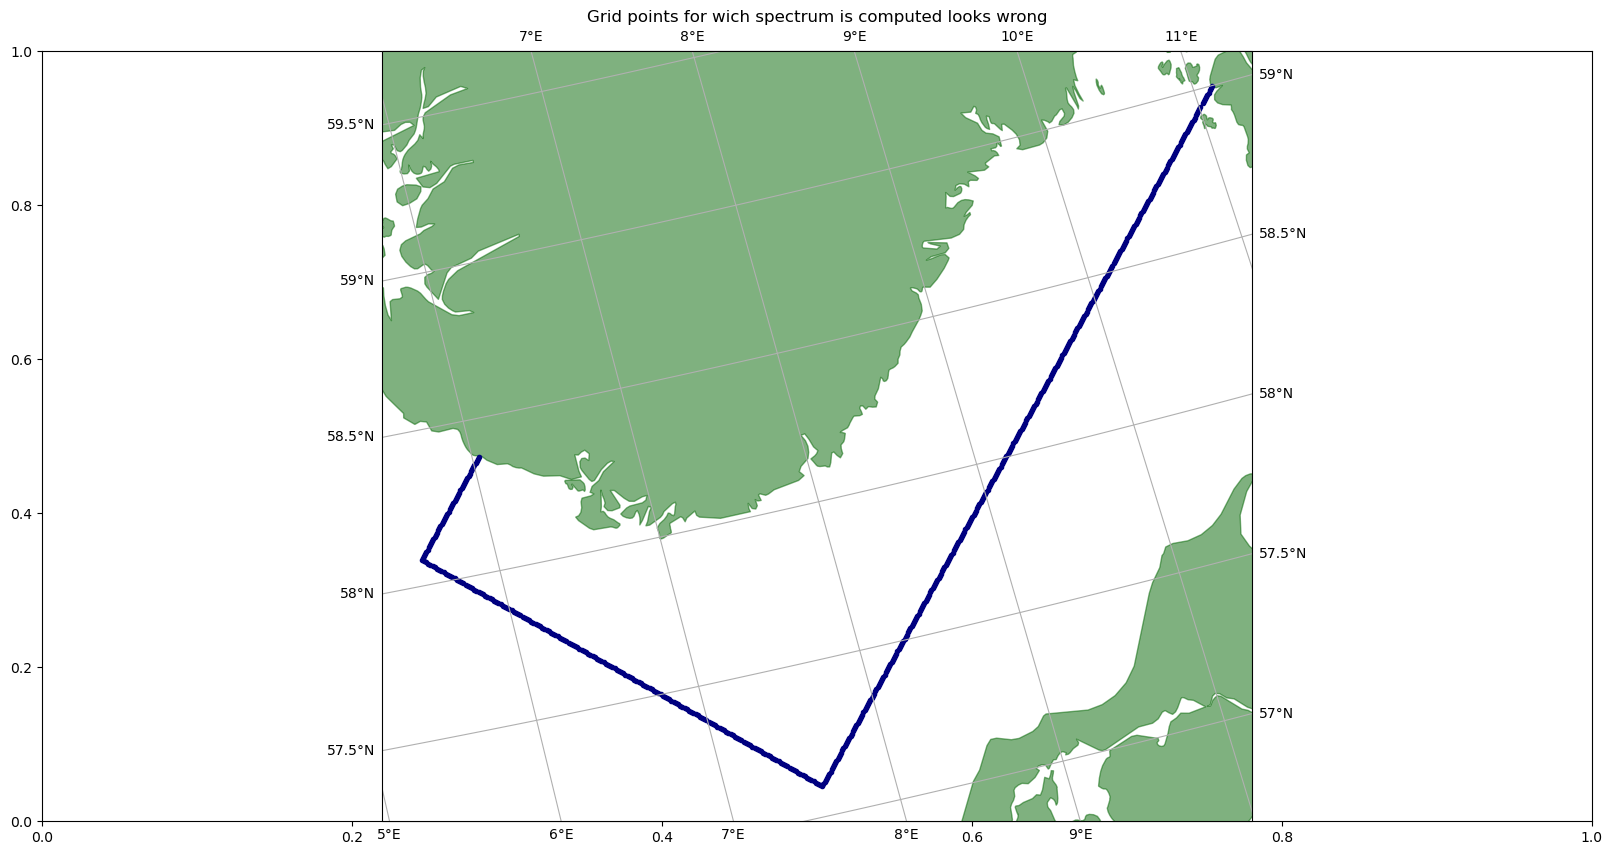

In [5]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = plt.axes(projection=ccrs.Orthographic(-10, 45))
ax.add_feature(cfeature.LAND,color='darkgreen', alpha = 0.5)
#ax.add_feature(cfeature.LAKES)
#ax.coastlines(resolution='50m', color='darkkhaki', linewidth=0.5)
ax.scatter(ds.longitude,ds.latitude,marker='.', color='navy', transform=ccrs.PlateCarree())
ax.set_title("Grid points for wich spectrum is computed looks wrong")
ax.gridlines(draw_labels=True)